In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np


from pandas.plotting import parallel_coordinates
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
plt.style.use('fivethirtyeight')
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#Load data

In [3]:
#Import data frame with standardized revenues and expenditures per school district
std_districts_FL = pd.read_csv(r"..\Data\Florida data\District Finances\FL_District_Finances.csv", index_col=0)

std_districts_FL.head(20)

,NAME,YRDATA,TOTALREV,TFEDREV,TSTREV,TLOCREV,TOTALEXP,TCURINST,TCURSSVC,TCURONON,TCAPOUT
0,ALACHUA COUNTY SCHOOL DISTRICT,2016,9.702167,1.270125,4.333970,4.098072,9.340386,4.968435,3.352738,0.626344,0.328715
1,BAKER COUNTY SCHOOL DISTRICT,2016,8.530388,0.965414,6.065374,1.499600,8.362055,4.367453,3.266693,0.565974,0.145542
2,BAY COUNTY SCHOOL DISTRICT,2016,9.979338,0.934416,3.981534,5.063389,9.527591,5.411936,2.667003,0.541305,0.797883
3,BRADFORD COUNTY SCHOOL DISTRICT,2016,10.011229,1.574860,5.697130,2.739239,9.352776,5.072052,3.243606,0.945415,0.083593
4,BREVARD COUNTY SCHOOL DISTRICT,2016,9.968929,1.037302,4.560299,4.371328,9.390130,5.292529,2.829184,0.455725,0.526518
5,BROWARD COUNTY SCHOOL DISTRICT,2016,9.688173,1.034166,3.735669,4.918338,9.858457,5.540398,2.850445,0.668801,0.487488
6,CALHOUN COUNTY SCHOOL DISTRICT,2016,10.270871,1.326225,6.753630,2.191016,14.481397,5.098457,3.592105,0.716878,5.073956
7,CHARLOTTE COUNTY SCHOOL DISTRICT,2016,10.582280,1.387834,2.091837,7.102609,10.801320,5.319220,3.666646,0.656622,0.936056
8,CITRUS COUNTY SCHOOL DISTRICT,2016,9.428393,1.089639,3.831148,4.507607,9.762754,5.046230,3.357115,0.618361,0.704918
9,CLAY COUNTY SCHOOL DISTRICT,2016,8.926825,0.768628,5.585485,2.572711,8.428326,5.240270,2.448878,0.451307,0.228561


In [4]:
#Import data frame with crime rates per county 
FL_child_poverty= pd.read_csv(r"..\Data\Florida data\Demographics\Kids in poverty by school district\Poverty concatenated.csv", index_col=0)
FL_child_poverty.head()

,FIPS State Code,CCD District ID,District Name,Total Population,Population of Children 5 to 17 years of Age,Estimated Number of Children in Poverty,File Name,Created Date,Year,Child Poverty Rate
0,12,30,ALACHUA COUNTY SCHOOL DISTRICT,217955,32777,6051,sd99_FL.dat,27FEB2003,1999,0.184611
1,12,60,BAKER COUNTY SCHOOL DISTRICT,22259,4557,968,sd99_FL.dat,27FEB2003,1999,0.212420
2,12,90,BAY COUNTY SCHOOL DISTRICT,148217,26663,4928,sd99_FL.dat,27FEB2003,1999,0.184825
3,12,120,BRADFORD COUNTY SCHOOL DISTRICT,26088,4281,919,sd99_FL.dat,27FEB2003,1999,0.214669
4,12,150,BREVARD COUNTY SCHOOL DISTRICT,476230,79992,9882,sd99_FL.dat,27FEB2003,1999,0.123537


In [5]:
FL_child_poverty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 0 to 1205
Data columns (total 10 columns):
FIPS State Code                                1206 non-null int64
CCD District ID                                1206 non-null int64
District Name                                  1206 non-null object
Total Population                               1206 non-null int64
Population of Children 5 to 17 years of Age    1206 non-null int64
Estimated Number of Children in Poverty        1206 non-null int64
File Name                                      1206 non-null object
Created Date                                   1206 non-null object
Year                                           1206 non-null int64
Child Poverty Rate                             1206 non-null float64
dtypes: float64(1), int64(6), object(3)
memory usage: 103.6+ KB


In [6]:
#Missing values
FL_child_poverty.isna().sum()

FIPS State Code                                0
CCD District ID                                0
District Name                                  0
Total Population                               0
Population of Children 5 to 17 years of Age    0
Estimated Number of Children in Poverty        0
File Name                                      0
Created Date                                   0
Year                                           0
Child Poverty Rate                             0
dtype: int64

In [7]:
#Descriptive statistics for child poverty rate
FL_child_poverty.describe()['Child Poverty Rate']

count    1206.000000
mean        0.213059
std         0.067297
min         0.070001
25%         0.160032
50%         0.209241
75%         0.256025
max         0.431646
Name: Child Poverty Rate, dtype: float64

In [8]:
FL_child_poverty['District Name'].unique()

array(['ALACHUA COUNTY SCHOOL DISTRICT', 'BAKER COUNTY SCHOOL DISTRICT',
       'BAY COUNTY SCHOOL DISTRICT', 'BRADFORD COUNTY SCHOOL DISTRICT',
       'BREVARD COUNTY SCHOOL DISTRICT', 'BROWARD COUNTY SCHOOL DISTRICT',
       'CALHOUN COUNTY SCHOOL DISTRICT',
       'CHARLOTTE COUNTY SCHOOL DISTRICT',
       'CITRUS COUNTY SCHOOL DISTRICT', 'CLAY COUNTY SCHOOL DISTRICT',
       'COLLIER COUNTY SCHOOL DISTRICT',
       'COLUMBIA COUNTY SCHOOL DISTRICT', 'DADE COUNTY SCHOOL DISTRICT',
       'DESOTO COUNTY SCHOOL DISTRICT', 'DIXIE COUNTY SCHOOL DISTRICT',
       'DUVAL COUNTY SCHOOL DISTRICT', 'ESCAMBIA COUNTY SCHOOL DISTRICT',
       'FLAGLER COUNTY SCHOOL DISTRICT',
       'FRANKLIN COUNTY SCHOOL DISTRICT',
       'GADSDEN COUNTY SCHOOL DISTRICT',
       'GILCHRIST COUNTY SCHOOL DISTRICT',
       'GLADES COUNTY SCHOOL DISTRICT', 'GULF COUNTY SCHOOL DISTRICT',
       'HAMILTON COUNTY SCHOOL DISTRICT', 'HARDEE COUNTY SCHOOL DISTRICT',
       'HENDRY COUNTY SCHOOL DISTRICT', 'HERNANDO CO

In [9]:
#Have District Name be all uppercase
FL_child_poverty['District Name'] = FL_child_poverty['District Name'].str.upper()


In [10]:
#Check
len(list(FL_child_poverty['District Name'].unique()))

67

In [11]:
#Rename Dade County to Miami-Dade in FL_child_poverty so that it matches FIPS codes file
d = {'DADE COUNTY SCHOOL DISTRICT':'MIAMI-DADE COUNTY SCHOOL DISTRICT'}
FL_child_poverty.replace({'District Name':d},inplace=True)


In [12]:
#load FIPS code file

FIPS_codes= pd.read_csv(r"..\Data\Florida data\FIPS code for counties.txt",header=None,names=['State','State FIPS Code','County FIPS Code','County','FIPS Class Code'],converters={'County FIPS Code': lambda x: str(x),'State FIPS Code': lambda x: str(x)})
FIPS_codes.head()

,State,State FIPS Code,County FIPS Code,County,FIPS Class Code
0,FL,12,001,Alachua County,H1
1,FL,12,003,Baker County,H1
2,FL,12,005,Bay County,H1
3,FL,12,007,Bradford County,H1
4,FL,12,009,Brevard County,H1


In [13]:
#generate unique state-county code needed for plotly

FIPS_codes['FIPS State+County'] = FIPS_codes['State FIPS Code']+FIPS_codes['County FIPS Code']

In [14]:
#Rename County column to match school district names in FL_child_poverty

FIPS_codes['Renamed County'] = FIPS_codes['County'].apply(lambda x: x.upper()+' SCHOOL DISTRICT')

In [15]:
FIPS_codes.head()

,State,State FIPS Code,County FIPS Code,County,FIPS Class Code,FIPS State+County,Renamed County
0,FL,12,001,Alachua County,H1,12001,ALACHUA COUNTY SCHOOL DISTRICT
1,FL,12,003,Baker County,H1,12003,BAKER COUNTY SCHOOL DISTRICT
2,FL,12,005,Bay County,H1,12005,BAY COUNTY SCHOOL DISTRICT
3,FL,12,007,Bradford County,H1,12007,BRADFORD COUNTY SCHOOL DISTRICT
4,FL,12,009,Brevard County,H1,12009,BREVARD COUNTY SCHOOL DISTRICT


In [16]:
#Merge FIPS State+County with FL_child_poverty

FL_child_poverty1 = FL_child_poverty.merge(FIPS_codes[['Renamed County','FIPS State+County']],left_on='District Name',right_on='Renamed County',how='left')

In [17]:
FL_child_poverty1.isna().sum()

FIPS State Code                                0
CCD District ID                                0
District Name                                  0
Total Population                               0
Population of Children 5 to 17 years of Age    0
Estimated Number of Children in Poverty        0
File Name                                      0
Created Date                                   0
Year                                           0
Child Poverty Rate                             0
Renamed County                                 0
FIPS State+County                              0
dtype: int64

# Exploratory Data Analysis for FL Child Poverty data
***

In [18]:
#Average poverty rate by district
avg_poverty = FL_child_poverty1.groupby(['District Name','FIPS State+County']).mean().reset_index(level=1)

In [19]:
avg_poverty.head()

,FIPS State+County,FIPS State Code,CCD District ID,Total Population,Population of Children 5 to 17 years of Age,Estimated Number of Children in Poverty,Year,Child Poverty Rate
District Name,,,,,,,,
ALACHUA COUNTY SCHOOL DISTRICT,12001,12.0,30.0,238233.944444,31593.777778,6027.777778,2007.5,0.190899
BAKER COUNTY SCHOOL DISTRICT,12003,12.0,60.0,25493.111111,4742.055556,949.166667,2007.5,0.198882
BAY COUNTY SCHOOL DISTRICT,12005,12.0,90.0,165169.388889,26905.833333,5326.388889,2007.5,0.197936
BRADFORD COUNTY SCHOOL DISTRICT,12007,12.0,120.0,27529.500000,4073.388889,930.500000,2007.5,0.229885
BREVARD COUNTY SCHOOL DISTRICT,12009,12.0,150.0,532022.833333,80619.055556,12076.888889,2007.5,0.150466


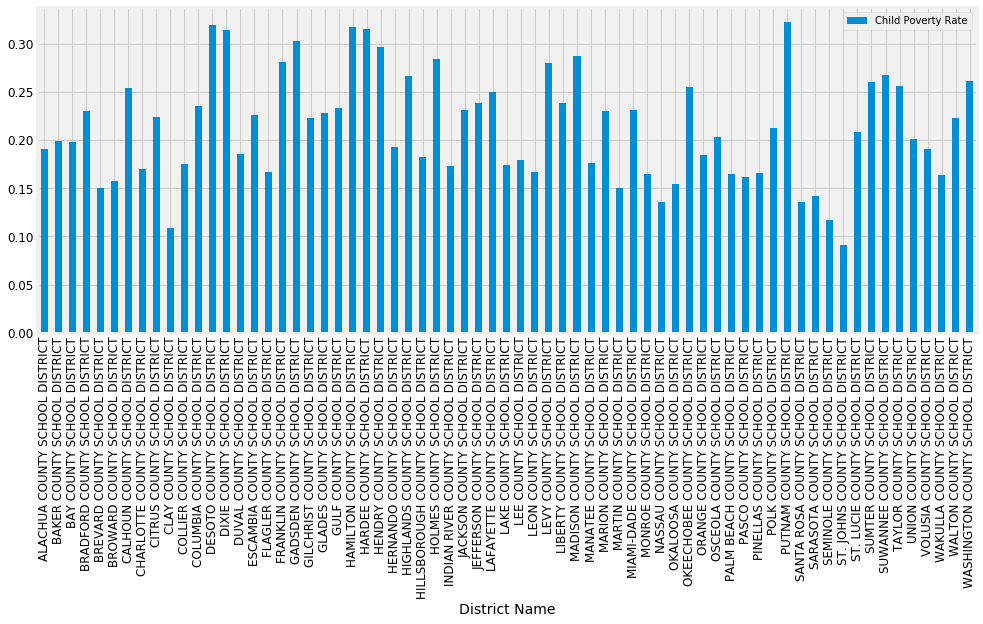

In [20]:
#Bar plot of average juvenile placement rate by state
avg_poverty[['Child Poverty Rate']].plot(figsize=(15, 6),kind='bar')
plt.show()

In [25]:
import plotly.plotly as py
import plotly.figure_factory as ff


values = avg_poverty['Child Poverty Rate'].tolist()
fips = avg_poverty['FIPS State+County'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
colorscale = ["#030512","#1d1d3b","#323268","#3d4b94","#3e6ab0",
              "#4989bc","#60a7c7","#85c5d3","#b7e0e4","#eafcfd"]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Florida'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Population by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
py.iplot(fig, filename='choropleth_florida')

ImportError: geopandas, pyshp and shapely must be installed for this figure factory.

Run the following commands to install the correct versions of the following modules:

```
pip install geopandas==0.3.0
pip install pyshp==1.2.10
pip install shapely==1.6.3
```
If you are using Windows, follow this post to properly install geopandas and dependencies:http://geoffboeing.com/2014/09/using-geopandas-windows/

If you are using Anaconda, do not use PIP to install the packages above. Instead use conda to install them:

```
conda install plotly
conda install geopandas
```

In [ ]:
#Basemap

#Basemap heatmap of Total Expenditure bar chart

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
ax = plt.gca() 
fig = plt.gcf()

# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
# Total revenue by state from std_states_2014
state_exp = pd.Series(std_states_2014['TOTAL_EXPENDITURE'].values,index=std_states_2014['STATE']).to_dict()

nodata_color = "darkgreen"
colors={}
statenames=[]
patches = []

cmap = plt.cm.hot
vmin = min(state_exp.values()); vmax = max(state_exp.values())
norm = Normalize(vmin=vmin, vmax=vmax)
# color mapper to covert values to colors
mapper = ScalarMappable(norm=norm, cmap=cmap)

for shapedict in m.states_info:
    statename = shapedict['NAME']
    if statename in state_exp:
        exp = state_exp[statename]
        colors[statename] = mapper.to_rgba(exp)
        statenames.append(statename)
    else:
        statenames.append(statename)
        colors[statename] = nodata_color

for nshape,seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]]) 
    poly = Polygon(seg,facecolor=color,edgecolor=color)
    if (colors[statenames[nshape]] == nodata_color):
        p_no = poly
    ax.add_patch(poly)
plt.title('Total Expenditure per Student by State in 2014')

# put legend for no data states
if p_no is not None:
    plt.legend((p_no,), ('No data',))

# construct custom colorbar
cax = fig.add_axes([0.27, 0.1, 0.5, 0.05]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Expenditure per student')
plt.show()






In [ ]:
#pivot
jp_pivot= juvenile_placement.pivot(index='TimeFrame',columns='Location',values='Data')
jp_pivot.head()

In [ ]:
#DC, South Dakota,Wyoming

plt.figure(figsize=(20, 8))
plt.plot(jp_pivot.index, jp_pivot['District of Columbia'], 'b-', label = 'DC')
plt.plot(jp_pivot.index, jp_pivot['South Dakota'], 'r-', label = 'SD')
plt.plot(jp_pivot.index, jp_pivot['Wyoming'], 'g-', label = 'WY')
plt.xlabel('Date')
plt.ylabel('Placement Rate (per 100,000)')
plt.title('Juvenile Placement Rates ')
plt.legend()


In [ ]:
#pivot
jp_pivot1= juvenile_placement.pivot(index='Location',columns='TimeFrame',values='Data').reset_index()

# Make the parallel coordinates plot
plt.figure(figsize=(20, 8))
parallel_coordinates(jp_pivot1, 'Location', colormap=plt.get_cmap("Set2"))

# Put a legend below current axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5,prop={'size': 15})

plt.show()

# How much does demographics (rate of kids in poverty) (inputs) contribute to school funding (output)?
***

In [ ]:
#Scatter plots of different features vs placement rate
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['TOTAL_REVENUE','TOTAL_EXPENDITURE','STATE_REVENUE']):
    funding_with_placement.plot.scatter(x=var,y='Data',c='DarkBlue', ax=axes[i], title=var)
axes[0].set_ylabel('Placement Rate')

In [ ]:
#Function to plot fitted line on top of scatter plot

def plot_fitted_line(X,y,predictions):
    # scatter-plot data
#     ax = df.plot(x=x, y=y, kind='scatter')
# # plot regression line on the same axes, set x-axis limit

    plt.scatter(X,y)
    plt.plot(X, predictions)
    return plt.show()

In [ ]:
##Robust linear model with a constant

cols_model = ['STATE_REVENUE']

X = funding_with_placement[cols_model]

X_const = sm.add_constant(X)

y = funding_with_placement["Data"] #juvenile placement rate

# Note the difference in argument order
model = sm.RLM(y, X_const, M=sm.robust.norms.HuberT()).fit()
predictions = model.predict(X_const) # make the predictions by the model

# Print out the statistics
model.summary()


In [ ]:
#Fitted line plot
plot_fitted_line(X,y,predictions)

In [ ]:
#Residual plot
plt.scatter(model.model.exog[:,0], model.resid)
plt.show()

In [ ]:
#3D plot of inputs vs output

# create matplotlib 3d axes

%matplotlib notebook
fig = plt.figure(figsize=(8, 5))
ax = Axes3D(fig, azim=-115, elev=15)

# plot data points

ax.scatter(funding_placement_naep.Reading, funding_placement_naep.Mathematics, funding_placement_naep['TOTAL_REVENUE'], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Revenue')


In [ ]:
## Create the 3d plot
# grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.Reading.min(), X.Reading.max(), 100), 
                       np.linspace(X.Mathematics.min(), X.Mathematics.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] * xx1 + model.params[1] * xx2

# create matplotlib 3d axes
%matplotlib notebook
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - predictions
ax.scatter(X[resid >= 0].Reading, X[resid >= 0].Mathematics, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].Reading, X[resid < 0].Mathematics, y[resid < 0], color='black', alpha=1.0)

# set axis labels

ax.set_xlabel('Reading')
ax.set_ylabel('Mathematics')
ax.set_zlabel('Total Revenue')

In [ ]:
#Have both data set with the same range of years: 1998-2016
FL_child_poverty = FL_juv_crime_rate.loc[FL_juv_crime_rate['Year'] != 2017]


In [ ]:
#Pull out county names from the school districts
std_districts_FL['COUNTY NAME'] = std_districts_FL.NAME.str.title().str.split().str[0]


In [ ]:
#This loop deals with the few exceptions that weren't covered in the previous command

for i, row in std_districts_FL.iterrows():
    for x in ["ST JOHNS", "ST LUCIE", "SANTA ROSA", "DE SOTO", "INDIAN RIVER"]:
        if x in std_districts_FL['NAME'][i]:
            std_districts_FL.at[i,'COUNTY NAME'] = x   
        

In [ ]:
std_districts_FL.rename(columns={'YRDATA': 'Year'}, inplace=True)
juv_crime_vs_finances = std_districts_FL.merge(FL_juv_crime_rate, on=["COUNTY NAME","Year"], how = 'inner')

list(juv_crime_vs_finances)

In [ ]:
cols = ['COUNTY NAME',
     'Year',
     'TOTALREV',
     'TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TOTALEXP',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT',
     'TOTAL ARRESTS',
     'JUVENILE POP',
     'CRIME RATE']

juv_crime_vs_finances = juv_crime_vs_finances[cols]

In [ ]:
juv_crime_vs_finances.head()

In [ ]:
juv_crime_vs_finances.to_csv(r"..\Data\Florida data\Merged_Datasets\juvenile_crime_vs_finances.csv")

In [ ]:
#Linear model without a constant

cols_model = ['TFEDREV',
     'TSTREV',
     'TLOCREV',
     'TCURINST',
     'TCURSSVC',
     'TCURONON',
     'TCAPOUT']

X = juv_crime_vs_finances[cols_model]
y = juv_crime_vs_finances["CRIME RATE"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()



In [ ]:


X = juv_crime_vs_finances['TOTALEXP']

y = juv_crime_vs_finances["CRIME RATE"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()
